In [1]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
import apogee.spec.plot as splot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# A quick check of the resolution at which we need to run Turbospectrum for the APOGEE resolution ($ R \approx 22,500$)

Let's generate a spectrum at $T_{\mathrm{eff}} = 4500 K$, $\log g = 2.5$ and solar abundances

In [2]:
atm= atlas9.Atlas9Atmosphere(teff=4500.,logg=2.5,metals=0.,am=0.,cm=0.)
synspec_jonres= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='turbospec.201312161124.new.vac',
                                                 Hlinelist='Hlinedata.vac',lsf='combo',cont='aspcap',
                                                 vmacro=6.,isotopes='solar',
                                                 dw=0.1)
synspec_hires= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='turbospec.201312161124.new.vac',
                                                Hlinelist='Hlinedata.vac',lsf='combo',cont='aspcap',
                                                vmacro=6.,isotopes='solar',
                                                dw=0.016)

/Library/Python/2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)



/Library/Python/2.7/site-packages/numpy/lib/nanfunctions.py:220: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)



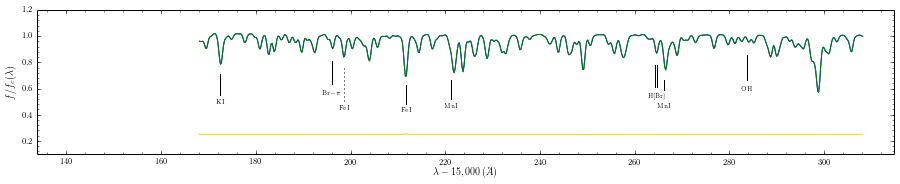

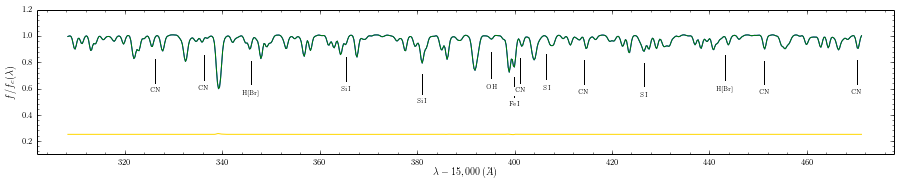

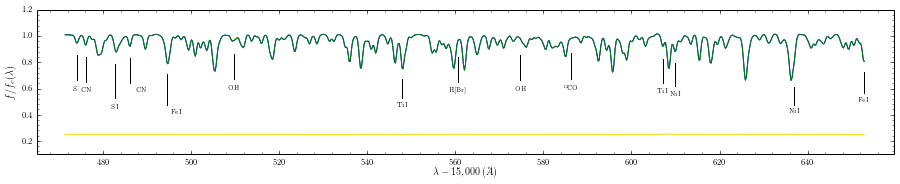

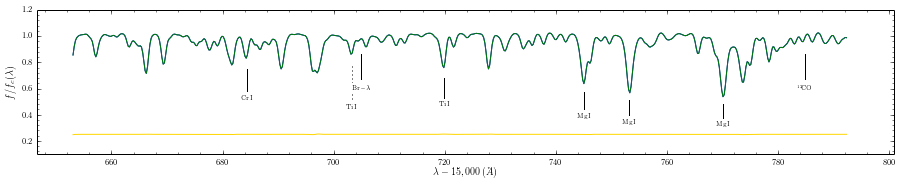

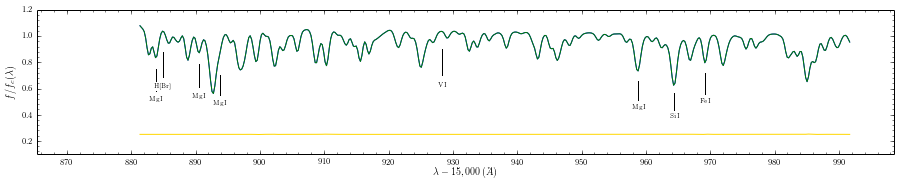

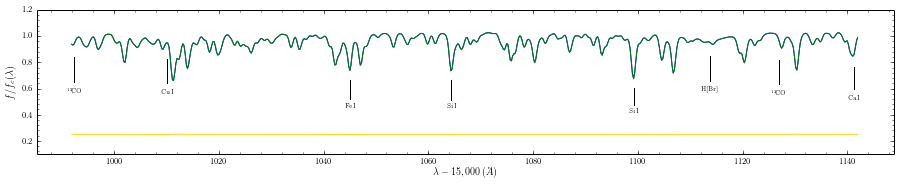

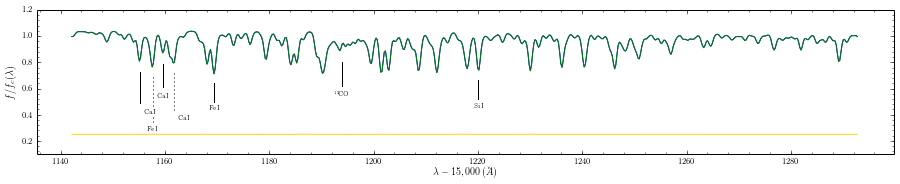

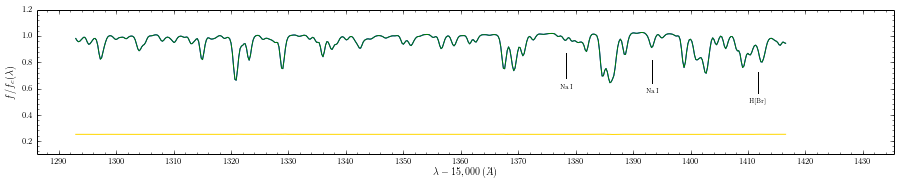

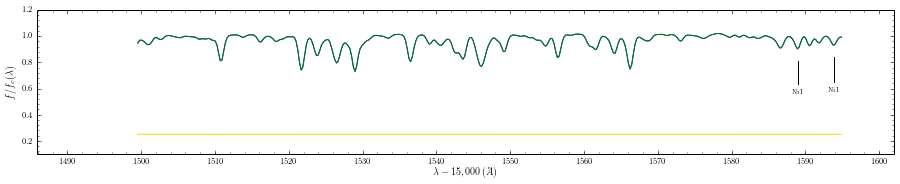

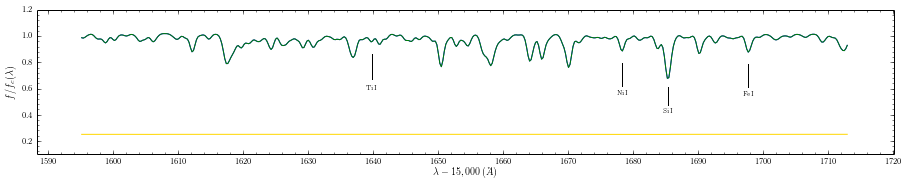

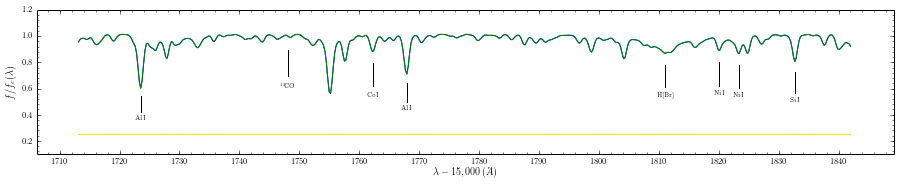

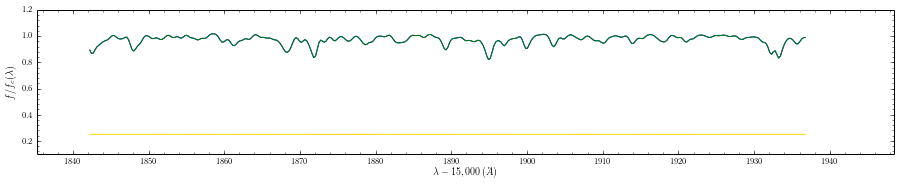

In [3]:
for panel in apogee.spec.plot.highres(synspec_jonres[0],synspec_hires[0],(synspec_hires[0]-synspec_jonres[0])*10.+0.25,
                                      yrange=[0.1,1.2],color=['b','g','gold'],labelLines=True,cleanZero=False,fig_width=14.):
    show()

Residuals everywhere

In [4]:
print numpy.nanstd(synspec_hires[0]-synspec_jonres[0]), numpy.nanmax(numpy.fabs(synspec_hires[0]-synspec_jonres[0]))

3.32304000756e-05 0.000619163070121


Let's look at a cooler star with small microturbulence ($T_{\mathrm{eff}} = 3500 K$, $\log g = 0.0$, $\xi = 0.5\,\mathrm{km\,s}^{-1}$, and solar abundances)

In [5]:
atm= atlas9.Atlas9Atmosphere(teff=3500.,logg=0.0,metals=0.,am=0.,cm=0.)
synspec_jonres= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='turbospec.201312161124.new.vac',
                                                 Hlinelist='Hlinedata.vac',lsf='combo',cont='aspcap',
                                                 vmacro=6.,isotopes='solar',vmicro=0.5,
                                                 dw=0.1)
synspec_hires= apogee.modelspec.turbospec.synth(modelatm=atm,linelist='turbospec.201312161124.new.vac',
                                                Hlinelist='Hlinedata.vac',lsf='combo',cont='aspcap',
                                                vmacro=6.,isotopes='solar',vmicro=0.5,
                                                dw=0.016)

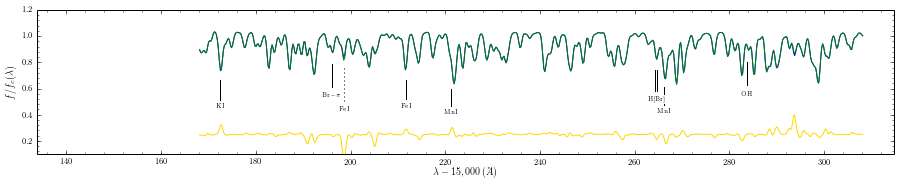

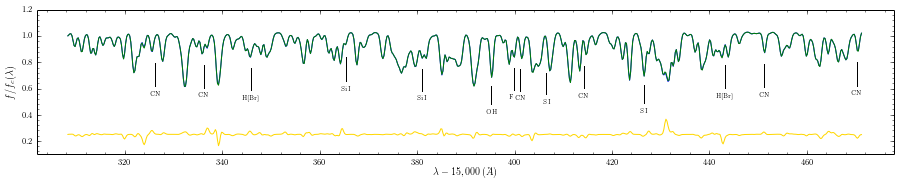

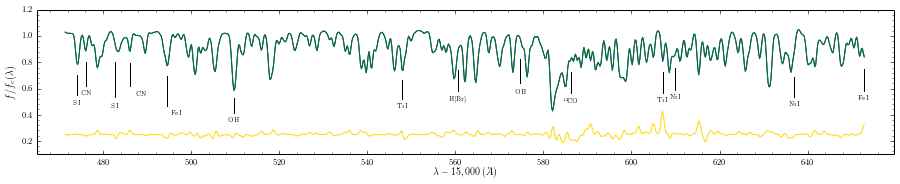

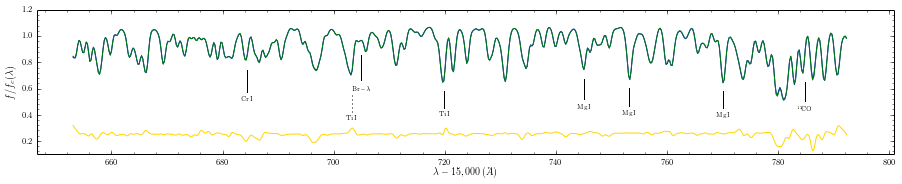

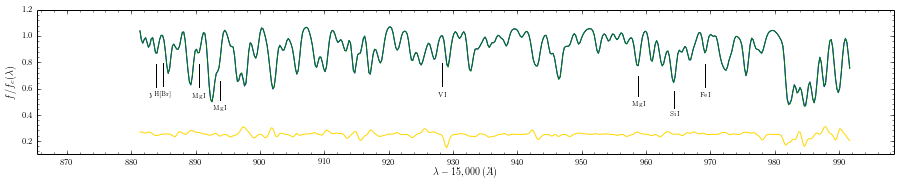

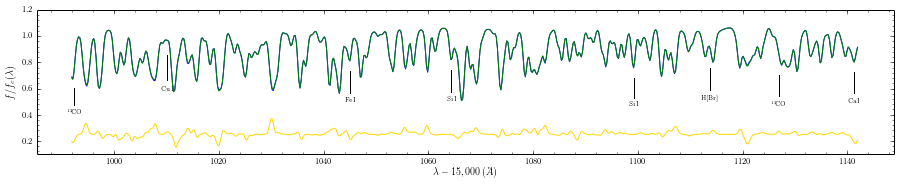

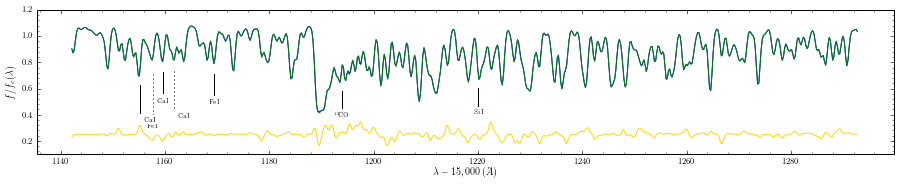

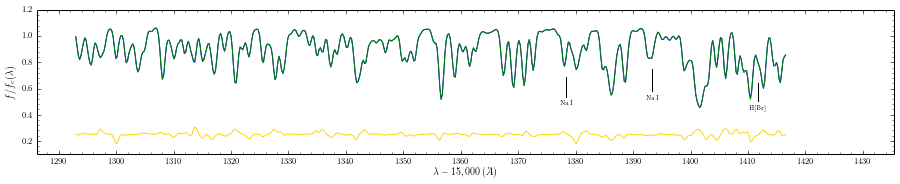

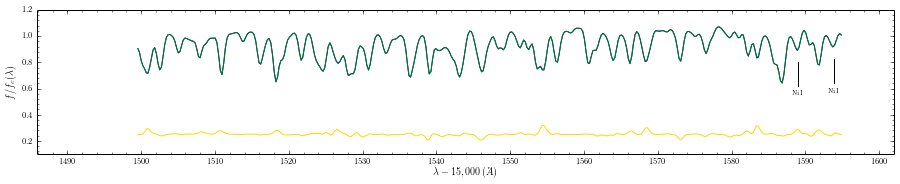

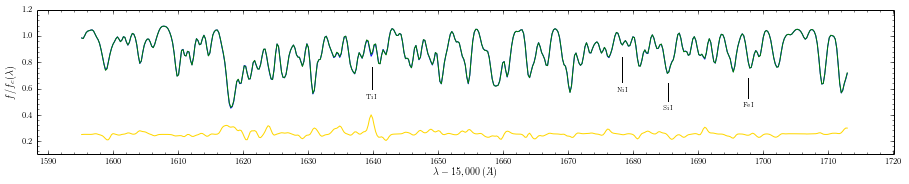

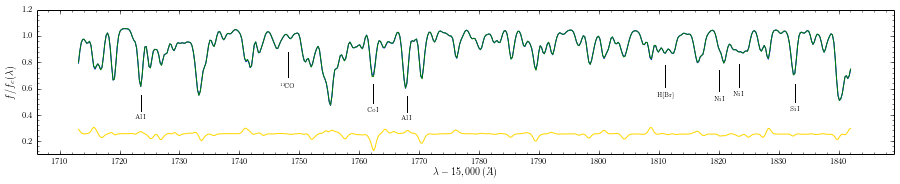

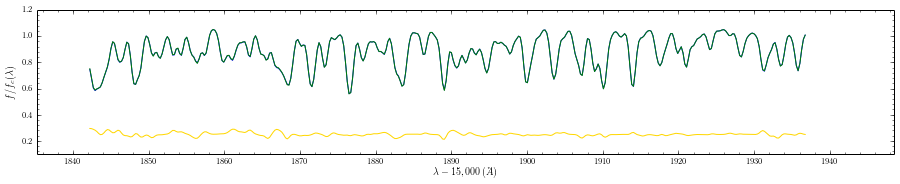

In [6]:
for panel in apogee.spec.plot.highres(synspec_jonres[0],synspec_hires[0],(synspec_hires[0]-synspec_jonres[0])*10.+0.25,
                                      yrange=[0.1,1.2],color=['b','g','gold'],labelLines=True,cleanZero=False,fig_width=14.):
    show()

Residuals everywhere

In [7]:
print numpy.nanstd(synspec_hires[0]-synspec_jonres[0]), numpy.nanmax(numpy.fabs(synspec_hires[0]-synspec_jonres[0]))

0.0019952678798 0.0205497430526
